# Multiple Linear Regression

## Import Libraries and Data

In [6]:
# connect colab ke g drive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Statmodels
import statsmodels
import statsmodels.api as sm

In [2]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda.
# Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
#path = "gdrive/My Drive/Data Notebook/"

## Exploratory Data Analysis (EDA) & Data Preprocessing

In [5]:
# Load data
df = pd.read_csv('insurance.csv')

# Display 5 data teratas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data yang digunakan adalah data tentang asuransi. Memiliki 7 kolom dengan nilai kontinu dan kategorikal.

In [7]:
df[['sex', 'smoker', 'region']].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


Merupakan 3 kolom dengan tipe data kategorikal. Yaitu kolom sex, smoker, dan region.

In [10]:
encoder = LabelEncoder()

df = df.apply(encoder.fit_transform)

Karena data tersebut masi berbentuk objek, maka kita harus lakukan encoding. Disini saya menggunakan label encoder untuk mendapatkan representasi angka dari kolom tersebut.

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254


Berikut adalah tampilan data yang sudah di encode.

#### Data Type

In [14]:
# Mendapatkan informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1338 non-null   int64
 1   sex       1338 non-null   int32
 2   bmi       1338 non-null   int64
 3   children  1338 non-null   int64
 4   smoker    1338 non-null   int32
 5   region    1338 non-null   int32
 6   charges   1338 non-null   int64
dtypes: int32(3), int64(4)
memory usage: 57.6 KB


In [16]:
# Melakukan analisa deskriptif
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,21.207025,0.505232,266.073991,1.094918,0.204783,1.515695,667.531390
std,14.049960,0.500160,137.520618,1.205493,0.403694,1.104885,386.338994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,157.250000,0.000000,0.000000,1.000000,333.250000
50%,21.000000,1.000000,266.000000,1.000000,0.000000,2.000000,667.500000
75%,33.000000,1.000000,371.750000,2.000000,0.000000,2.000000,1001.750000
max,46.000000,1.000000,547.000000,5.000000,1.000000,3.000000,1336.000000


### Missing Value



In [18]:
# Check missing value
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dapat dilihat data ini tidak terdapat missing value.

### Duplicates data

In [22]:
# Cek duplicate
duplicate = df[df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,1,1,269,0,0,1,41


Pada data ini, terdapat duplicate sebanyak satu baris.

In [24]:
# drop duplicate
df.drop_duplicates(inplace=True)

Maka dari itu, kita lakukan penghapusan data duplicate tersebut.

In [26]:
# Cek ukuran data apakah duplicate sudah terhapus
df.shape

(1337, 7)

### Asumsi Analisis Regresi

Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

#### Uji Normalitas

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data.

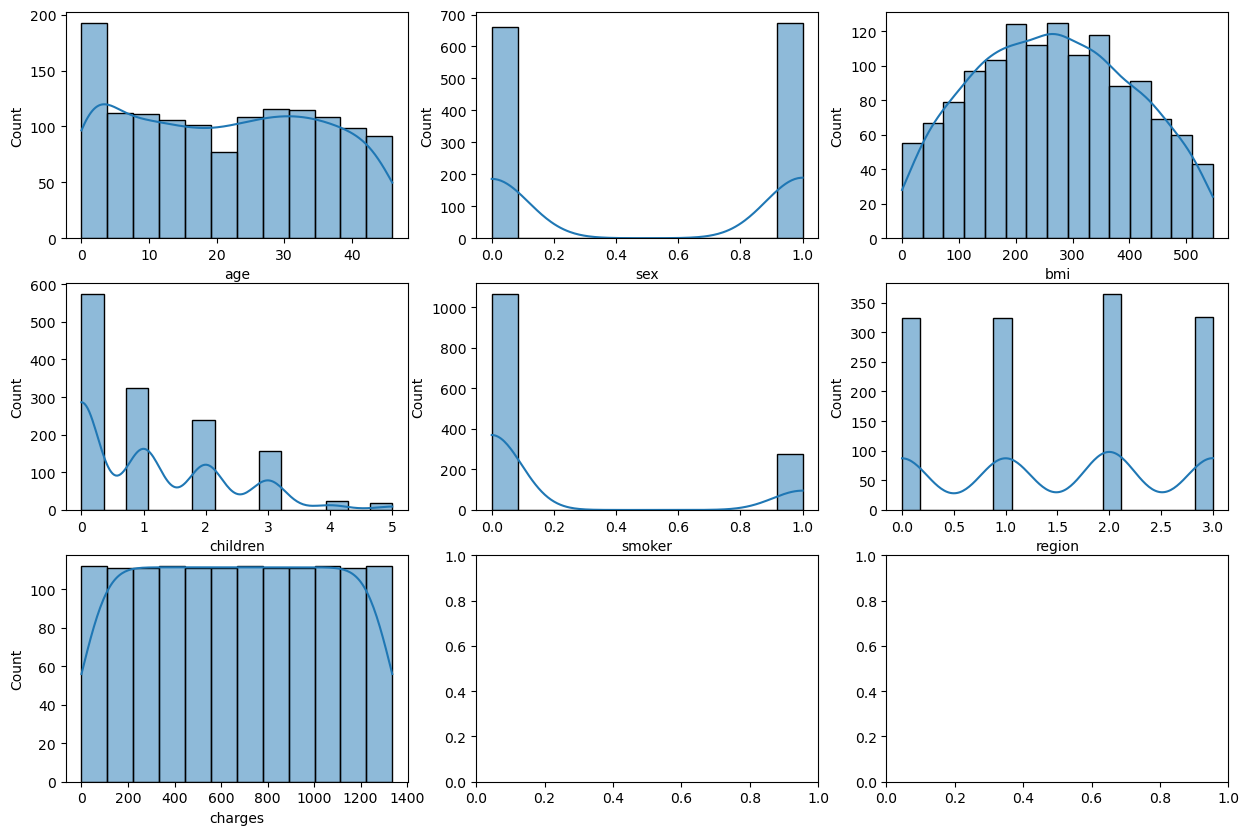

In [227]:
# Cek normalitas data dengan histogram
#warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.histplot(df["age"], ax=axes[0, 0], kde=True)
sns.histplot(df["sex"], ax=axes[0, 1], kde=True)
sns.histplot(df["bmi"], ax=axes[0, 2], kde=True)
sns.histplot(df["children"], ax=axes[1, 0], kde=True)
sns.histplot(df["smoker"], ax=axes[1, 1], kde=True)
sns.histplot(df["region"], ax=axes[1, 2], kde=True)
sns.histplot(df["charges"], ax=axes[2, 0], kde=True)

plt.show()


Dari distribusi histogram, dapat dilihat bahwa variable bmi merupakan yang berdistribusi paling normal.

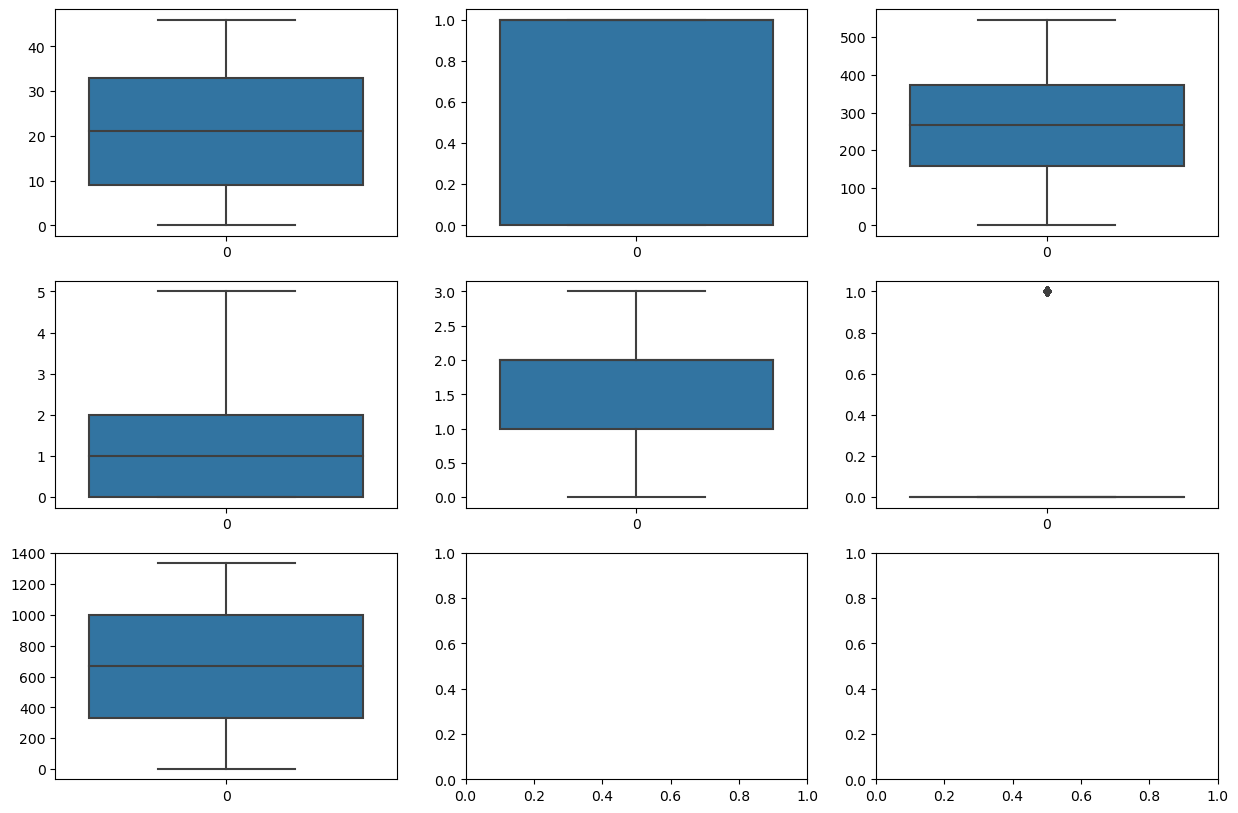

In [229]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(df["age"], ax=axes[0, 0])
sns.boxplot(df["sex"], ax=axes[0, 1])
sns.boxplot(df["bmi"], ax=axes[0, 2])
sns.boxplot(df["children"], ax=axes[1, 0])
sns.boxplot(df["region"], ax=axes[1, 1])
sns.boxplot(df["smoker"], ax=axes[1, 2])
sns.boxplot(df["charges"], ax=axes[2, 0])

plt.show()

Dari data numerik yang ada pada dataset, tidak terdapat oulier yang terdeteksi.

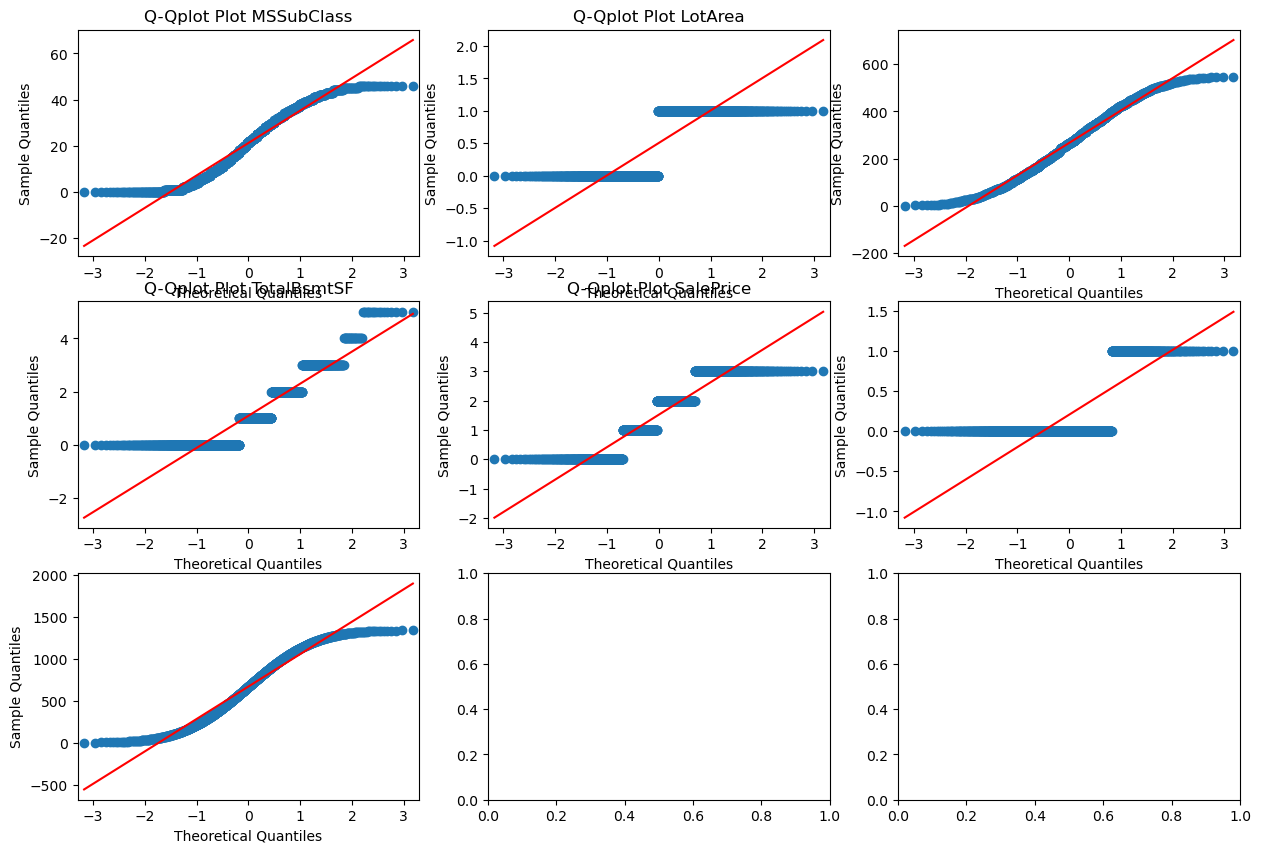

In [52]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sm.graphics.qqplot(df["age"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot MSSubClass')

sm.graphics.qqplot(df["sex"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot LotArea')

sm.graphics.qqplot(df["bmi"].dropna(), line='s', ax=axes[0, 2])
axes[1, 0].title.set_text('Q-Qplot Plot TotalBsmtSF')

sm.graphics.qqplot(df["children"].dropna(), line='s', ax=axes[1, 0])
axes[1, 1].title.set_text('Q-Qplot Plot SalePrice')

sm.graphics.qqplot(df["region"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot SalePrice')

sm.graphics.qqplot(df["smoker"].dropna(), line='s', ax=axes[1, 2])
axes[1, 1].title.set_text('Q-Qplot Plot SalePrice')

sm.graphics.qqplot(df["charges"].dropna(), line='s', ax=axes[2, 0])
axes[1, 1].title.set_text('Q-Qplot Plot SalePrice')

plt.show()

Uji Normalitas dengan Shapiro Wilk

H0 : data berdistribusi normal<br>
H1 : data tidak berdistribusi normal

In [44]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = df.columns

for i in column:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.945, p=0.000
Tolak H0, age tidak berdistribusi normal
Statistics=0.637, p=0.000
Tolak H0, sex tidak berdistribusi normal
Statistics=0.978, p=0.000
Tolak H0, bmi tidak berdistribusi normal
Statistics=0.823, p=0.000
Tolak H0, children tidak berdistribusi normal
Statistics=0.495, p=0.000
Tolak H0, smoker tidak berdistribusi normal
Statistics=0.859, p=0.000
Tolak H0, region tidak berdistribusi normal
Statistics=0.955, p=0.000
Tolak H0, charges tidak berdistribusi normal


#### Uji Linearitas

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

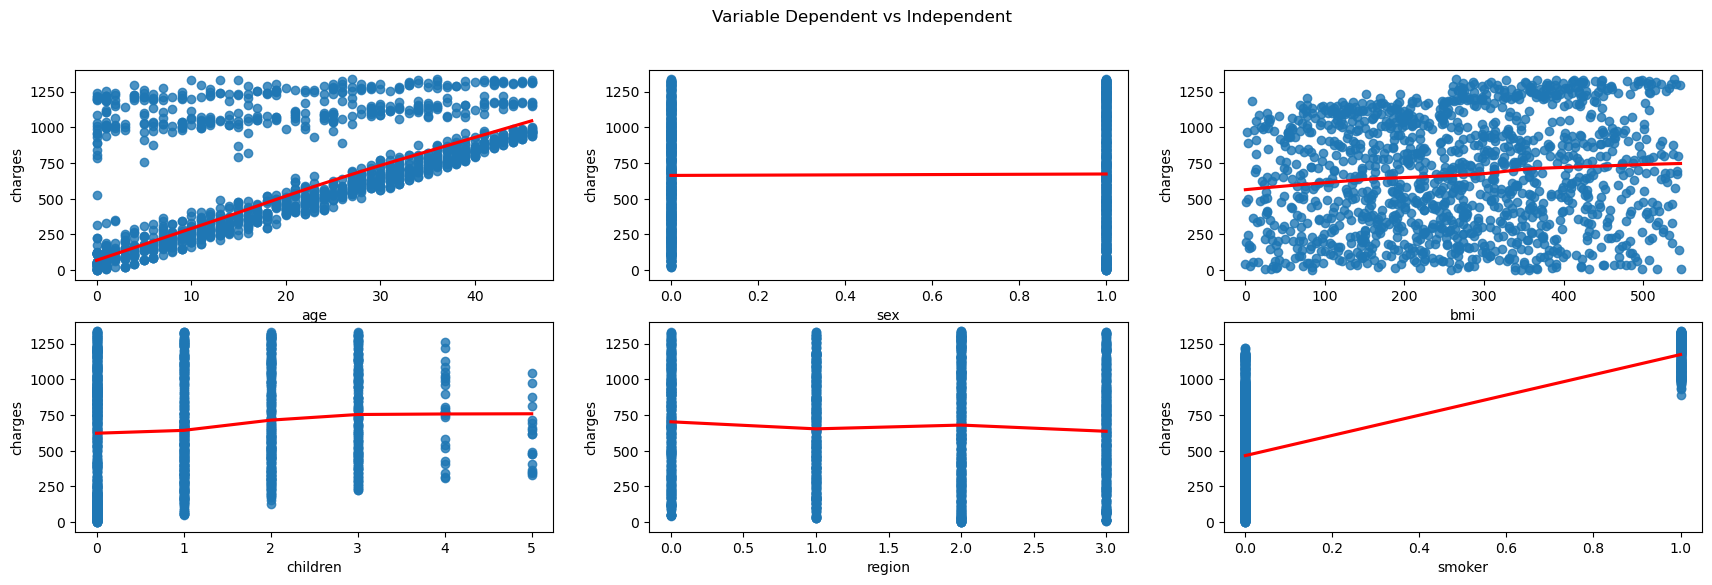

In [92]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(2, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df["age"], y=df["charges"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,0])
sns.regplot(x=df["sex"], y=df["charges"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,1])
sns.regplot(x=df["bmi"], y=df["charges"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,2])
sns.regplot(x=df["children"], y=df["charges"], lowess=True, line_kws={'color': 'red'}, ax=axes[1,0])
sns.regplot(x=df["region"], y=df["charges"], lowess=True, line_kws={'color': 'red'}, ax=axes[1,1])
sns.regplot(x=df["smoker"], y=df["charges"], lowess=True, line_kws={'color': 'red'}, ax=axes[1,2])

plt.show()

#### Uji Multikolinearitas

Uji multikolinearitas adalah untuk melihat ada atau tidaknya korelasi yang tinggi antara variabel-variabel bebas dalam suatu model regresi linear berganda

<Axes: >

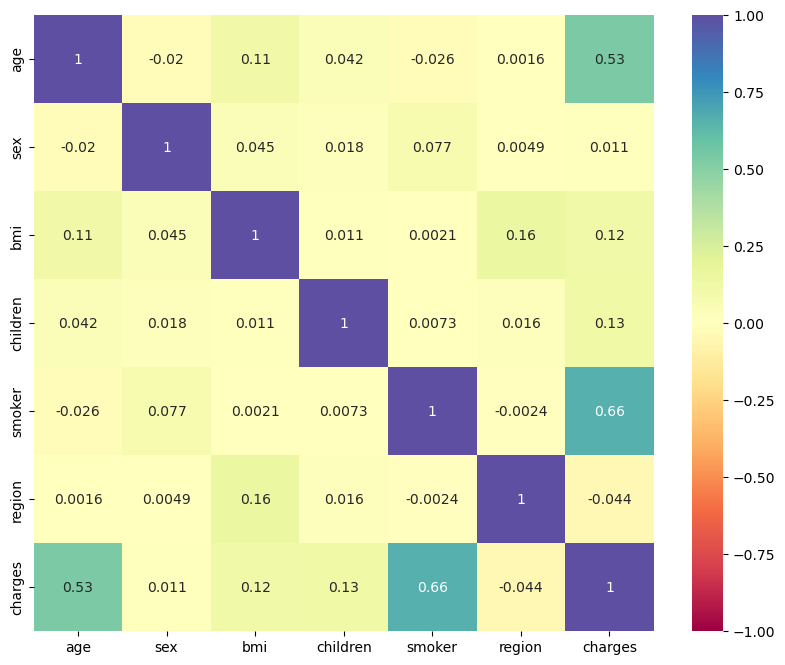

In [96]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

Smoker dan age memiliki korelasi positif dengan variabel target yaitu charges.

In [98]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["charges"].sort_values()
korelasi

region     -0.044394
sex         0.010748
bmi         0.120047
children    0.125191
age         0.533714
smoker      0.663611
charges     1.000000
Name: charges, dtype: float64

Nilai korelasi yang diperoleh antar variabel bebas relatif kecil, sehingga asumsi terpenuhi

### Scaling
Scaling digunakan untuk merubah skala pada data. Penggunaan scaling dapat membantu mengurangi gap antar kolom dalam data, proses ini tidak merubah distribusi dalam data, hanya melakukan pengubahan skala data.

In [102]:
# Scale data
scaler = StandardScaler()
scaled_insurance = scaler.fit_transform(df)
scaled_insurance

array([[-1.44041773, -1.00977099, -0.50226515, ...,  1.96966039,
         1.34316271,  0.87315076],
       [-1.51164747,  0.99032355,  0.61029548, ..., -0.50770174,
         0.43801727, -1.58307156],
       [-0.79935006,  0.99032355,  0.47213436, ..., -0.50770174,
         0.43801727, -0.93792456],
       ...,
       [-1.51164747, -1.00977099,  1.13385342, ..., -0.50770174,
         0.43801727, -1.64784536],
       [-1.29795825, -1.00977099, -0.8731187 , ..., -0.50770174,
         1.34316271, -1.4949792 ],
       [ 1.55123139, -1.00977099, -0.26957273, ...,  1.96966039,
        -0.46712816,  1.30324877]])

In [104]:
# Membuat dataframe dari hasil scalling
scaled_insurance = pd.DataFrame(scaled_insurance, columns=df.columns)
scaled_insurance

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,-1.009771,-0.502265,-0.909234,1.969660,1.343163,0.873151
1,-1.511647,0.990324,0.610295,-0.079442,-0.507702,0.438017,-1.583072
2,-0.799350,0.990324,0.472134,1.580143,-0.507702,0.438017,-0.937925
3,-0.443201,0.990324,-1.403948,-0.909234,-0.507702,-0.467128,1.111518
4,-0.514431,0.990324,-0.313203,-0.909234,-0.507702,-0.467128,-1.072654
...,...,...,...,...,...,...,...
1332,0.767704,0.990324,0.072194,1.580143,-0.507702,-0.467128,0.202094
1333,-1.511647,-1.009771,0.261257,-0.909234,-0.507702,-1.372274,-1.425024
1334,-1.511647,-1.009771,1.133853,-0.909234,-0.507702,0.438017,-1.647845
1335,-1.297958,-1.009771,-0.873119,-0.909234,-0.507702,1.343163,-1.494979


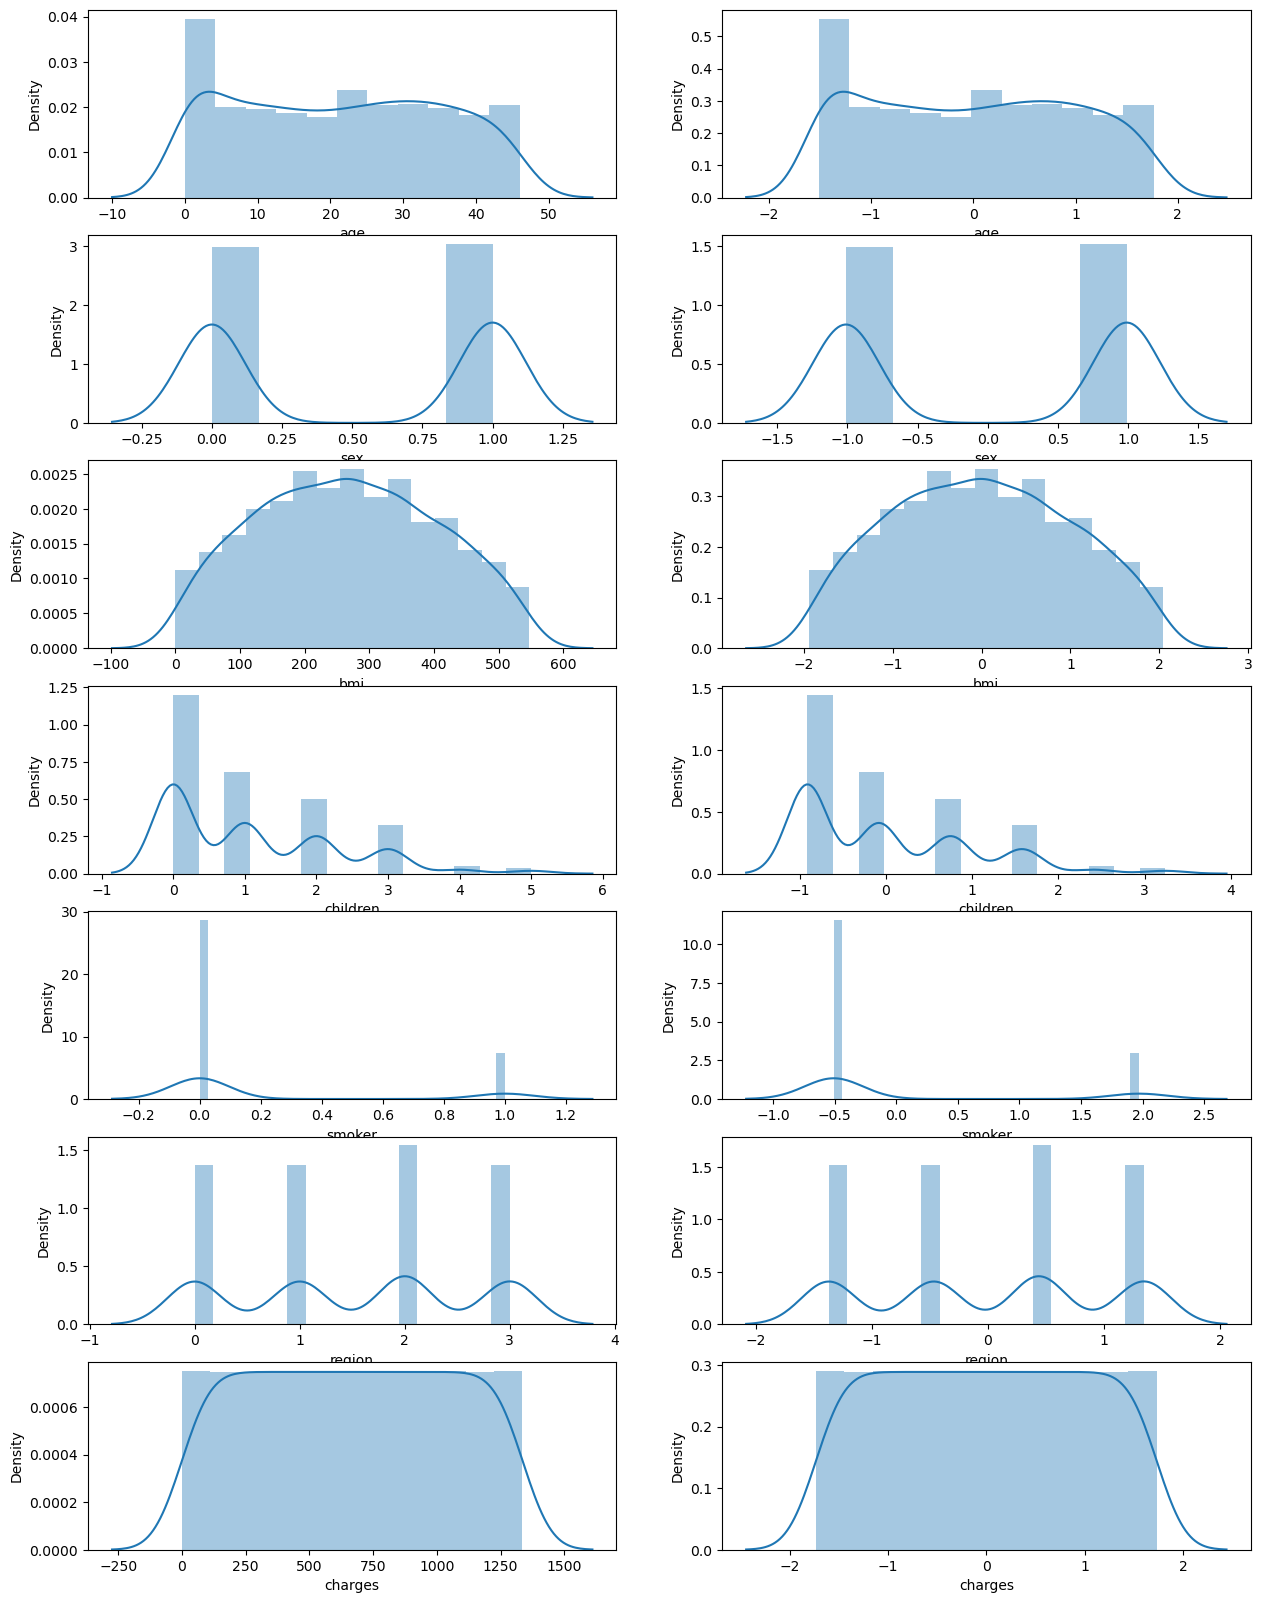

In [110]:
# Plot variabel sebelum dan sesudah scaling
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(7, 2, figsize=(15, 20))

sns.distplot(df["age"], ax=axes[0, 0])
sns.distplot(scaled_insurance["age"], ax=axes[0, 1])
sns.distplot(df["sex"], ax=axes[1, 0])
sns.distplot(scaled_insurance["sex"], ax=axes[1, 1])
sns.distplot(df["bmi"], ax=axes[2, 0])
sns.distplot(scaled_insurance["bmi"], ax=axes[2, 1])
sns.distplot(df["children"], ax=axes[3, 0])
sns.distplot(scaled_insurance["children"], ax=axes[3, 1])
sns.distplot(df["smoker"], ax=axes[4, 0])
sns.distplot(scaled_insurance["smoker"], ax=axes[4, 1])
sns.distplot(df["region"], ax=axes[5, 0])
sns.distplot(scaled_insurance["region"], ax=axes[5, 1])
sns.distplot(df["charges"], ax=axes[6, 0])
sns.distplot(scaled_insurance["charges"], ax=axes[6, 1])

plt.show()

## Membangun Model Regresi

### Train Test Split

Proses ini merupakan proses pembagian data dalam bentuk, train (untuk membangun model), dan test (untuk testing dari model yang terbentuk) dengan pembagian 70% data train dan 30% data test

In [114]:
X = scaled_insurance.drop("charges", axis=1).values
y = scaled_insurance["charges"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [116]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  935
Ukuran X test  402
Ukuran y train  935
Ukuran y test  402


### Membangun model dengan package Statsmodels

In [119]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [121]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [123]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     481.7
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          5.55e-281
Time:                        11:37:15   Log-Likelihood:                -654.19
No. Observations:                 935   AIC:                             1322.
Df Residuals:                     928   BIC:                             1356.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.016     -0.160      0.8

Secara keseluruhan, model ini mampu menjelaskan sebagian besar variasi dalam variabel y dengan R-squared sebesar 0.757, yang menunjukkan bahwa model cukup baik. Variabel x1, x3, x4, x5, dan x6 memiliki kontribusi signifikan dalam model ini, sementara x2 tidak memberikan kontribusi yang berarti.

Namun, hasil diagnosa menunjukkan adanya masalah normalitas pada residual (dengan nilai Omnibus dan Jarque-Bera yang signifikan), yang dapat memengaruhi validitas inferensi statistik dalam model ini. Mungkin perlu dilakukan diagnosa lebih lanjut atau transformasi pada data untuk menangani masalah ini. Selain itu, tidak terdapat masalah multikolinearitas yang signifikan dalam model.

Ringkasnya, model ini memiliki kinerja yang baik dalam menjelaskan variabel y, namun perlu perhatian pada aspek normalitas residual.

In [126]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.75696456948385
adjusted coefficient of determination: 0.7553932197175819
regression coefficients: [-0.002557    0.53727768 -0.01408845  0.06093787  0.10173812  0.67693882
 -0.05217977]


In [130]:
# membuat list
list_columns = []

for i in df.columns:
  if i != "charges":
    list_columns.append(i)

In [132]:
list_columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [138]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_charge"] = y_test
df_statsmod["prediction_charge"] = prediction_1
df_statsmod.head()

,age,sex,bmi,children,smoker,region,actual_charge,prediction_charge
0,-1.511647,-1.009771,1.548337,-0.909234,-0.507702,0.438017,-1.632300,-1.165195
1,0.554015,-1.009771,-0.211400,-0.079442,-0.507702,0.438017,-0.145093,-0.078174
2,0.696474,0.990324,0.152182,-0.079442,-0.507702,-1.372274,-0.012955,0.086804
3,-1.440418,0.990324,-0.029609,-0.909234,1.969660,0.438017,1.334340,0.425762
4,0.838934,-1.009771,-1.847518,-0.909234,-0.507702,-0.467128,0.051819,-0.061986


#### Uji distrubusi residual

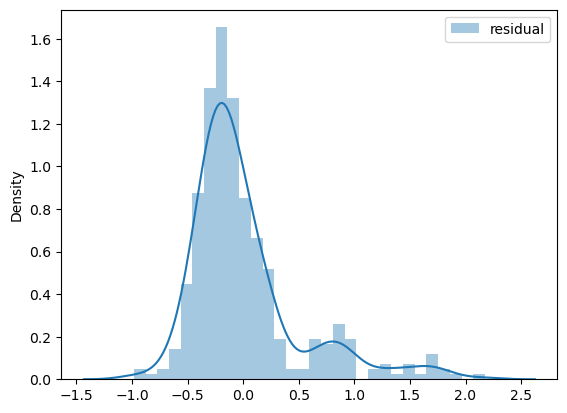

In [140]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_charge'] - df_statsmod['prediction_charge']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [142]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.825, p=0.000
Tolak H0, residual tidak berdistribusi normal


Dari gambar diatas, plot residual yang dihasilkan membentuk lonceng, tetapi pada pengujian normalitas dengan uji Shapiro-Wilk menunjukkan bahwa residual tidak berdistribusi normal. Sehingga dapat disimpulkan residual tidak berdistribusi normal.

In [144]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,age,sex,bmi,children,smoker,region,actual_charge,prediction_charge,residual
0,-1.511647,-1.009771,1.548337,-0.909234,-0.507702,0.438017,-1.632300,-1.165195,-0.467104
1,0.554015,-1.009771,-0.211400,-0.079442,-0.507702,0.438017,-0.145093,-0.078174,-0.066919
2,0.696474,0.990324,0.152182,-0.079442,-0.507702,-1.372274,-0.012955,0.086804,-0.099759
3,-1.440418,0.990324,-0.029609,-0.909234,1.969660,0.438017,1.334340,0.425762,0.908578
4,0.838934,-1.009771,-1.847518,-0.909234,-0.507702,-0.467128,0.051819,-0.061986,0.113805


Plot data actual dan prediction <br>
Untuk membandingkan hasil data prediksi dengan data yang asli (actual), dapat dibentuk menjadi plot berikut :

<function matplotlib.pyplot.show(close=None, block=None)>

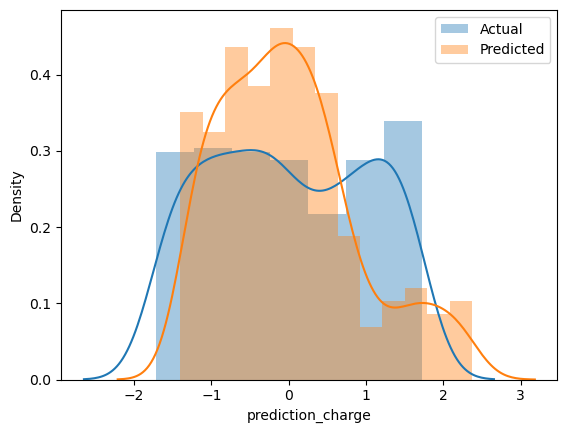

In [147]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_charge'], label="Actual")
sns.distplot(df_statsmod['prediction_charge'], label="Predicted")
plt.legend()
plt.show

#### Asumsi autokorelasi

Prediksi tidak mengikuti data asli, maka dapat dikatakan prediksi masih kurang bagus.

In [149]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

2.01351005473862

#### Uji Homoskedasitas

Uji Homoskedasitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain, dari grafik yang dihasilkan dibawah ini, terlihat data berkumpul dalam satu pusat sehingga dapat dikatakan homoskedasitas terpenuhi


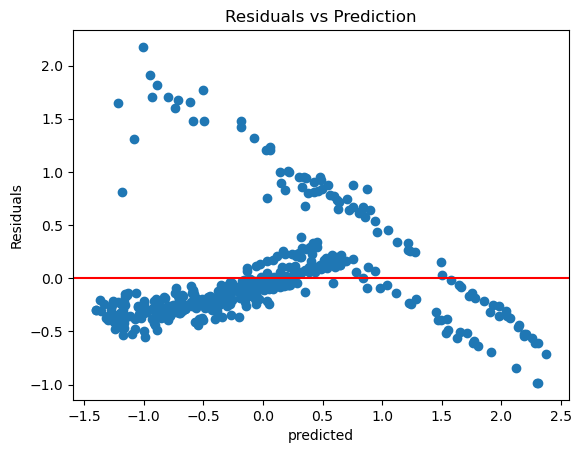

In [168]:
asm_homosk = plt.scatter(df_statsmod['prediction_charge'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
#asm_homosk = sns.lineplot([-3,9],[0,0],color='red')
plt.axhline(y=0, color='r', linestyle='-')
asm_homosk = plt.title('Residuals vs Prediction')

## Evaluation Model

In [183]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_charge'], df_statsmod['prediction_charge']))

R-square : 0.7673145633534854


In [185]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_charge'], df_statsmod['prediction_charge']))

MSE : 0.24549697100031095


##Uji Partial Analisis Regresi
**Uji Parameter T-test** memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [203]:
print("Number of elements in tvalues:", len(results.tvalues))
print("tvalues:", results.tvalues)


Number of elements in tvalues: 7
tvalues: [-0.15978263 33.30966866 -0.87840897  3.74208713  6.42846467 41.90944195
 -3.22908597]


In [217]:
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5, t_test_X6 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)
print("T-test score X6: ", t_test_X6)

T-test score const:  -0.1597826326112865
T-test score X1:  33.30966866484793
T-test score X2:  -0.8784089708894172
T-test score X3:  3.742087130640458
T-test score X4:  6.428464670271594
T-test score X5:  41.90944195253609
T-test score X6:  -3.2290859662221014


In [219]:

p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5, p_value_X6 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)
print("P-value X6: ", p_value_X6)

P-value const:  0.8730870756312293
P-value X1:  1.167461893918685e-160
P-value X2:  0.37994919007552785
P-value X3:  0.00019370968489884532
P-value X4:  2.0590987894515147e-10
P-value X5:  2.930631863755473e-216
P-value X6:  0.0012854712729501732


Diperoleh dari output diatas, bahwa P-value ketiga variabel kurang dari 0,05 sehingga Hypothesis null ditolak dan dapat disimpulkan, bahwa ketiga variabel independen (X) memberikan pengaruh secara signifikan pada variabel dependen charges(Y).

**Uji kelayakan model F-test** memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak

In [221]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  481.7288841309728
P-value :  5.549450518095551e-281
Tolak H0


Dari output diatas, diperoleh p-value kurang dari 0,05 sehingga hypothesis null ditolak dan dapat disimpulkan bahwa model regresi dari ketiga variabel independen dan variabel dependen charges (Y) layak digunakan.

# Notes

* Linear Assumption. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
* The residual error plot should be normally distributed.
* The mean of residual error should be 0 or close to 0 as much as possible
* Remove Noise. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
* Remove Collinearity. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
* Gaussian Distributions. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
* Rescale Inputs: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.